<a href="https://colab.research.google.com/github/pdpranavkumar/Machine-Learning-Models/blob/master/logistic_regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Function

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

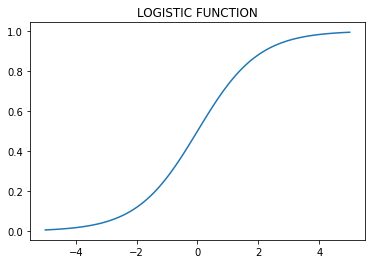

In [6]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + np.exp(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.title('LOGISTIC FUNCTION')
plt.show()

# Defining the cost function for Logistic Regression